In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

In [2]:
main_bike_df =  pd.read_csv(filepath_or_buffer='./LondonBikeJourneyAug2023.csv')

In [3]:
main_bike_df

,Number,Start date,Start station number,Start station,End date,End station number,End station,Bike number,Bike model,Total duration,Total duration (ms)
0,132825189,8/1/2023 0:00,1190,"Kennington Lane Rail Bridge, Vauxhall",8/1/2023 0:17,1059,"Albert Embankment, Vauxhall",23715,CLASSIC,16m 46s,1006663
1,132825190,8/1/2023 0:00,1190,"Kennington Lane Rail Bridge, Vauxhall",8/1/2023 0:17,1059,"Albert Embankment, Vauxhall",41267,CLASSIC,16m 47s,1007128
2,132825191,8/1/2023 0:00,983,"Euston Road, Euston",8/1/2023 0:11,3500,"Baldwin Street, St. Luke's",53180,CLASSIC,11m 6s,666395
3,132825192,8/1/2023 0:01,3479,"Old Brompton Road, South Kensington",8/1/2023 0:12,1140,"Grosvenor Road, Pimlico",53431,CLASSIC,11m 53s,713059
4,132825193,8/1/2023 0:01,1219,"Lower Marsh, Waterloo",8/1/2023 0:17,200056,"Vauxhall Walk, Vauxhall",54758,CLASSIC,16m 3s,963786
...,...,...,...,...,...,...,...,...,...,...,...
776522,133624570,8/31/2023 23:59,988,"Great Russell Street, Bloomsbury",9/1/2023 0:21,200071,"Hoxton Street, Hoxton",21149,CLASSIC,22m 0s,1320884
776523,133624571,8/31/2023 23:59,2660,"Frith Street, Soho",9/1/2023 0:10,3496,"St Mary's Hospital, Paddington",59065,CLASSIC,11m 2s,662204
776524,133624572,8/31/2023 23:59,200190,"Queen's Circus, Battersea Park",9/1/2023 0:13,3435,"Gloucester Road (Central), South Kensington",53860,CLASSIC,13m 38s,818554
776525,133624573,8/31/2023 23:59,959,"Milroy Walk, South Bank",9/1/2023 0:06,1142,"Tooley Street, Bermondsey",56206,CLASSIC,7m 0s,420132


In [4]:
print(main_bike_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776527 entries, 0 to 776526
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Number                776527 non-null  int64 
 1   Start date            776527 non-null  object
 2   Start station number  776527 non-null  int64 
 3   Start station         776527 non-null  object
 4   End date              776527 non-null  object
 5   End station number    776527 non-null  int64 
 6   End station           776527 non-null  object
 7   Bike number           776527 non-null  int64 
 8   Bike model            776527 non-null  object
 9   Total duration        776527 non-null  object
 10  Total duration (ms)   776527 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 65.2+ MB
None


In [5]:
main_bike_df['Start date'] = pd.to_datetime(main_bike_df['Start date'])
main_bike_df['End date'] = pd.to_datetime(main_bike_df['End date'])
main_bike_df['Total duration (minutes)'] = main_bike_df['Total duration (ms)'] / 60000
main_bike_df['Trip Day'] = main_bike_df['Start date'].dt.day_name()
main_bike_df['Start Hour'] = main_bike_df['Start date'].dt.hour
main_bike_df['End Hour'] = main_bike_df['End date'].dt.hour
main_bike_df['Weekend'] = main_bike_df['Trip Day'].isin(['Saturday', 'Sunday']).astype(int)
main_bike_df = main_bike_df.loc[main_bike_df['Total duration (minutes)'] <= 120]

In [6]:
main_bike_df

,Number,Start date,Start station number,Start station,End date,End station number,End station,Bike number,Bike model,Total duration,Total duration (ms),Total duration (minutes),Trip Day,Start Hour,End Hour,Weekend
0,132825189,2023-08-01 00:00:00,1190,"Kennington Lane Rail Bridge, Vauxhall",2023-08-01 00:17:00,1059,"Albert Embankment, Vauxhall",23715,CLASSIC,16m 46s,1006663,16.777717,Tuesday,0,0,0
1,132825190,2023-08-01 00:00:00,1190,"Kennington Lane Rail Bridge, Vauxhall",2023-08-01 00:17:00,1059,"Albert Embankment, Vauxhall",41267,CLASSIC,16m 47s,1007128,16.785467,Tuesday,0,0,0
2,132825191,2023-08-01 00:00:00,983,"Euston Road, Euston",2023-08-01 00:11:00,3500,"Baldwin Street, St. Luke's",53180,CLASSIC,11m 6s,666395,11.106583,Tuesday,0,0,0
3,132825192,2023-08-01 00:01:00,3479,"Old Brompton Road, South Kensington",2023-08-01 00:12:00,1140,"Grosvenor Road, Pimlico",53431,CLASSIC,11m 53s,713059,11.884317,Tuesday,0,0,0
4,132825193,2023-08-01 00:01:00,1219,"Lower Marsh, Waterloo",2023-08-01 00:17:00,200056,"Vauxhall Walk, Vauxhall",54758,CLASSIC,16m 3s,963786,16.063100,Tuesday,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776522,133624570,2023-08-31 23:59:00,988,"Great Russell Street, Bloomsbury",2023-09-01 00:21:00,200071,"Hoxton Street, Hoxton",21149,CLASSIC,22m 0s,1320884,22.014733,Thursday,23,0,0
776523,133624571,2023-08-31 23:59:00,2660,"Frith Street, Soho",2023-09-01 00:10:00,3496,"St Mary's Hospital, Paddington",59065,CLASSIC,11m 2s,662204,11.036733,Thursday,23,0,0
776524,133624572,2023-08-31 23:59:00,200190,"Queen's Circus, Battersea Park",2023-09-01 00:13:00,3435,"Gloucester Road (Central), South Kensington",53860,CLASSIC,13m 38s,818554,13.642567,Thursday,23,0,0
776525,133624573,2023-08-31 23:59:00,959,"Milroy Walk, South Bank",2023-09-01 00:06:00,1142,"Tooley Street, Bermondsey",56206,CLASSIC,7m 0s,420132,7.002200,Thursday,23,0,0


In [7]:
main_bike_df['Total duration (minutes)'].describe()

count    769654.000000
mean         18.027661
std          15.419364
min           0.021783
25%           8.043104
50%          13.860575
75%          22.858050
max         119.997517
Name: Total duration (minutes), dtype: float64

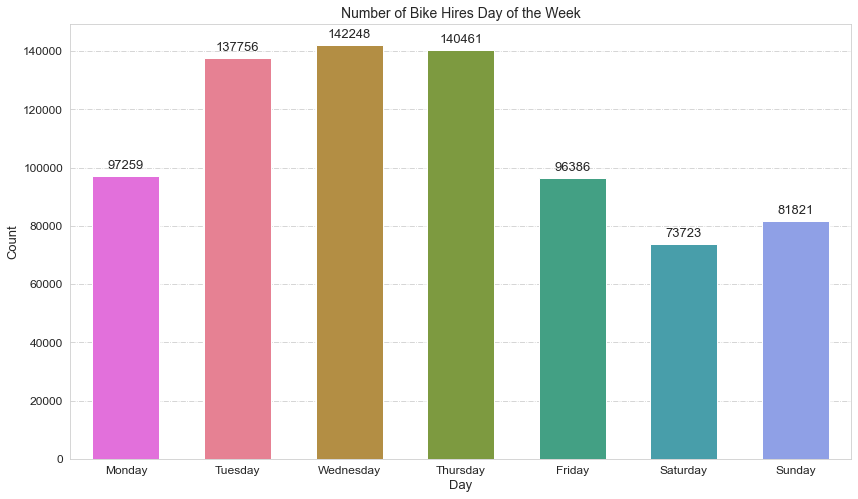

In [8]:
sns.set_style("whitegrid", {'grid.linestyle': '-.'})
custom_colors_1 = sns.color_palette("husl", 7)
plt.figure(figsize=(14,8))

plot_1 = sns.countplot(x='Trip Day', data=main_bike_df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette=custom_colors_1, hue='Trip Day', width=0.6)

for p in plot_1.patches:
    plot_1.annotate(format(p.get_height() / 1, '.0f'),  
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10),
                textcoords = 'offset points', fontsize=13)
    
plt.title('Number of Bike Hires Day of the Week', fontsize=14)
plt.xlabel('Day', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

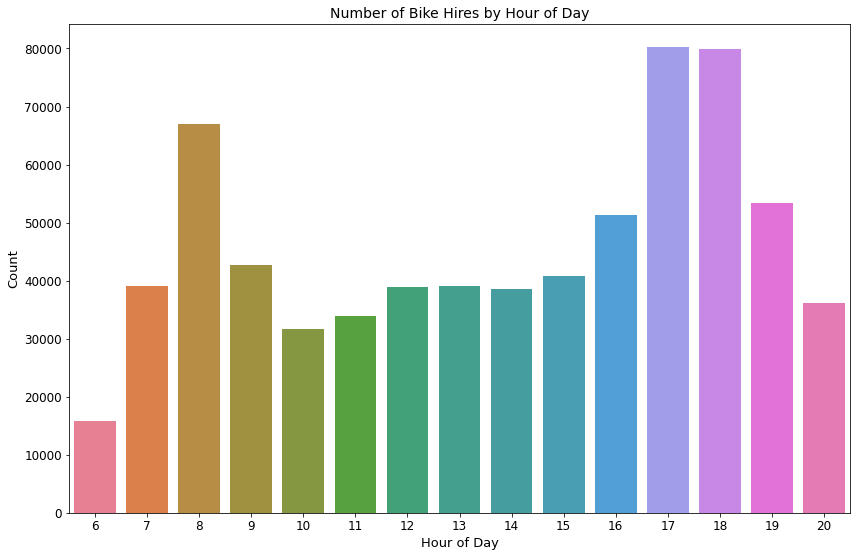

In [7]:
plt.figure(figsize=(14,9))
custom_colors_2 = sns.color_palette("husl", 15)
day_hours = main_bike_df[(main_bike_df['Start Hour'] > 5) & (main_bike_df['Start Hour'] < 21)]
sns.countplot(x='Start Hour', data=day_hours,palette=custom_colors_2, hue='Start Hour', legend=False)
plt.title('Number of Bike Hires by Hour of Day', fontsize=14)
plt.xlabel('Hour of Day' , fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### Risk analysis

In [10]:
risk_data = main_bike_df.groupby(['Trip Day', 'Start Hour']).size().reset_index(name='Hires')
risk_data

,Trip Day,Start Hour,Hires
0,Friday,0,1103
1,Friday,1,585
2,Friday,2,402
3,Friday,3,201
4,Friday,4,293
...,...,...,...
163,Wednesday,19,10692
164,Wednesday,20,7054
165,Wednesday,21,5185
166,Wednesday,22,3844


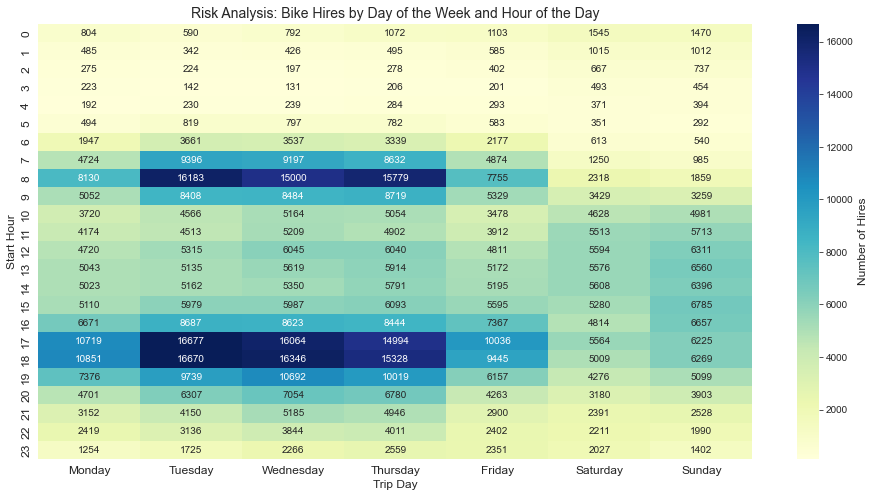

In [11]:
heatmap_data = risk_data.pivot(index="Start Hour", columns="Trip Day", values="Hires")

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data[days_order]

plt.figure(figsize=(16, 8))
heatmap = sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt="d", cbar_kws={'label': 'Number of Hires'})
cbar = heatmap.collections[0].colorbar
cbar.set_label('Number of Hires', fontsize=12) 
plt.title('Risk Analysis: Bike Hires by Day of the Week and Hour of the Day', fontsize=14)
plt.xlabel('Trip Day', fontsize=12)
plt.ylabel('Start Hour', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

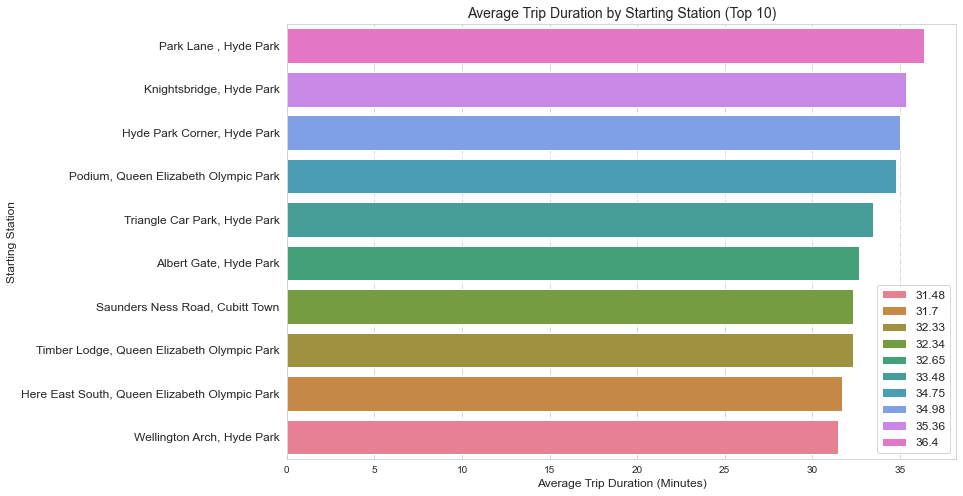

In [14]:
avg_duration_by_station = main_bike_df.groupby('Start station')['Total duration (minutes)'].mean().nlargest(10)
custom_colors_3 = sns.color_palette("husl", 10)
plt.figure(figsize=(12,8))
sns.barplot(y=avg_duration_by_station.index, x=avg_duration_by_station.values, palette=custom_colors_3, hue=avg_duration_by_station.values.round(2), legend=True)
plt.title('Average Trip Duration by Starting Station (Top 10)', fontsize=14)
plt.xlabel('Average Trip Duration (Minutes)',fontsize=12)
plt.ylabel('Starting Station',fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='lower right',fontsize=12)
plt.show()

In [9]:
def time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

#day_hours['Time of Day'] = day_hours['Start Hour'].apply(time_of_day)

day_hours.loc[:, 'Time of Day'] = day_hours['Start Hour'].apply(time_of_day)

# Create a "Trip Duration Category" feature based on 'Total duration (minutes)'
day_hours.loc[:, 'Trip Duration Category'] = pd.cut(day_hours['Total duration (minutes)'],
                                             bins=[0, 10, 30, 60, 120, float('inf')],
                                             labels=['Very Short', 'Short', 'Medium', 'Long', 'Very Long'])


In [10]:
day_hours.info()

<class 'pandas.core.frame.DataFrame'>
Index: 688318 entries, 632 to 774591
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Number                    688318 non-null  int64         
 1   Start date                688318 non-null  datetime64[ns]
 2   Start station number      688318 non-null  int64         
 3   Start station             688318 non-null  object        
 4   End date                  688318 non-null  datetime64[ns]
 5   End station number        688318 non-null  int64         
 6   End station               688318 non-null  object        
 7   Bike number               688318 non-null  int64         
 8   Bike model                688318 non-null  object        
 9   Total duration            688318 non-null  object        
 10  Total duration (ms)       688318 non-null  int64         
 11  Total duration (minutes)  688318 non-null  float64       
 12  Trip 

In [12]:
day_hours

,Number,Start date,Start station number,Start station,End date,End station number,End station,Bike number,Bike model,Total duration,Total duration (ms),Total duration (minutes),Trip Day,Start Hour,End Hour,Weekend,Time of Day,Trip Duration Category
632,132825836,2023-08-01 06:00:00,200167,"Twig Folly Bridge, Mile End",2023-08-01 06:12:00,200238,"Westferry DLR, Limehouse",57326,CLASSIC,12m 18s,738933,12.315550,Tuesday,6,6,0,Morning,Short
633,132825837,2023-08-01 06:00:00,1062,"Braham Street, Aldgate",2023-08-01 06:05:00,1201,"Bank of England Museum, Bank",59819,CLASSIC,4m 26s,266612,4.443533,Tuesday,6,6,0,Morning,Very Short
634,132825838,2023-08-01 06:00:00,200123,"Burdett Road, Mile End",2023-08-01 06:15:00,2587,"Wormwood Street, Liverpool Street",23157,CLASSIC,14m 23s,863257,14.387617,Tuesday,6,6,0,Morning,Short
635,132825840,2023-08-01 06:01:00,200149,"Watney Street, Shadwell",2023-08-01 06:10:00,1080,"Great Tower Street, Monument",55117,CLASSIC,9m 30s,570093,9.501550,Tuesday,6,6,0,Morning,Very Short
636,132825841,2023-08-01 06:01:00,300043,"St. Peter's Terrace, Fulham",2023-08-01 06:24:00,2589,"Pembridge Villas, Notting Hill",58847,CLASSIC,22m 43s,1363261,22.721017,Tuesday,6,6,0,Morning,Short
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774587,133622543,2023-08-31 20:59:00,200077,"Vicarage Crescent, Battersea",2023-08-31 21:07:00,300005,"Ethelburga Estate, Battersea Park",50141,CLASSIC,7m 45s,465695,7.761583,Thursday,20,21,0,Evening,Very Short
774588,133622544,2023-08-31 20:59:00,200032,"Kennington Oval, Oval",2023-08-31 21:11:00,1070,"Bricklayers Arms, Borough",59126,CLASSIC,11m 31s,691007,11.516783,Thursday,20,21,0,Evening,Short
774589,133622529,2023-08-31 20:59:00,300221,"Battersea Power Station, Battersea Park",2023-08-31 21:07:00,200210,"Westbridge Road, Battersea",55712,CLASSIC,8m 55s,535628,8.927133,Thursday,20,21,0,Evening,Very Short
774590,133622531,2023-08-31 20:59:00,200148,"Ansell House, Stepney",2023-08-31 21:03:00,200082,"St. Mary & St. Michael Church, Stepney",56375,CLASSIC,4m 34s,274113,4.568550,Thursday,20,21,0,Evening,Very Short


In [13]:
day_hours = day_hours.dropna()

In [1]:
#To be Continued